# Problem Set 8, Part Two: Due Tuesday, April 1 by 8am Eastern Daylight Time

## Name: David Millard

**Show your work on all problems!** Be sure to give credit to any
collaborators, or outside sources used in solving the problems. Note
that if using an outside source to do a calculation, you should use it
as a reference for the method, and actually carry out the calculation
yourself; it’s not sufficient to quote the results of a calculation
contained in an outside source.

Fill in your solutions in the notebook below, inserting markdown and/or code cells as needed.  Try to do reasonably well with the typesetting, but don't feel compelled to replicate my formatting exactly.  **You do NOT need to make random variables blue!**

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0,5.0)
plt.rcParams['font.size'] = 14

## $p$-Value Estimation

For **three** of the six problems on this problem set, perform a Monte Carlo
simulation, or enumerate all of the equally likely explicit possibilites, to estimate the $p$-value for the test in question.  (Please delete problems you do not wish to attempt, and move any "extra" problems to the end.  You will be graded on the first three problems in your notebook.)

### Conover Problems on Two-Sample K-S Tests

#### Exercise 6.3.2:

A random sample of five sixth-grade boys in one section of town were
given a literacy test with the following results; 82, 74, 87, 86, 75. A
random sample of eight sixth-grade boys from a different section of town
were given the same literacy test with these scores resulting: 88, 77,
91, 88, 94, 93, 83, 94. Is there a difference in literacy, as measured
by this test, in the two populations of sixth-grade boys? (Use the
Smirnov test).

$H_0: F_X(t) = F_Y(t)$

$H_1: F_X(t) \neq F_Y(t)$ 

$T = 0.75$

$p$-value  $= 0.04195$

Since $00.04195 < 0.05$, we have sufficent evidence to reject $H_0$.

In [3]:
x_i = np.array([82, 74, 87, 86, 75])
y_j = np.array([88, 77, 91, 88, 94, 93, 83, 94]) + np.random.rand(8)*(1e-5) # deal with ties

In [4]:
n = len(x_i); m = len(y_j); N=n+m; x_i.sort(); y_j.sort(); x_i, y_j

(array([74, 75, 82, 86, 87]),
 array([77.00000638, 83.00000334, 88.00000353, 88.00000917, 91.00000498,
        93.00000205, 94.00000093, 94.00000648]))

In [5]:
Fxhat_i = (1.+np.arange(n))/n; Fyhat_j = (1.+np.arange(m))/m; X_k = np.concatenate((x_i,y_j)); X_k.sort()

In [6]:
Fxhat_k = np.mean(x_i[None,:] <= X_k[:,None], axis=-1); Fyhat_k = np.mean(y_j[None,:] <= X_k[:,None], axis=-1)

In [8]:
print('For        X <= %.2f, Fxhat(X)-Fyhat(X) = 0-0 = 0' % X_k[0])
for k in range(1,N):
    print('For %.2f < X <= %.2f, Fxhat(X)-Fyhat(X) = %g-%g = %g'
          % (X_k[k-1],X_k[k],Fxhat_k[k-1],Fyhat_k[k-1],Fxhat_k[k-1]-Fyhat_k[k-1]))
print('For %g < X           , Fxhat(X)-Fyhat(X) = 1-1 = 0' % X_k[-1])

For        X <= 74.00, Fxhat(X)-Fyhat(X) = 0-0 = 0
For 74.00 < X <= 75.00, Fxhat(X)-Fyhat(X) = 0.2-0 = 0.2
For 75.00 < X <= 77.00, Fxhat(X)-Fyhat(X) = 0.4-0 = 0.4
For 77.00 < X <= 82.00, Fxhat(X)-Fyhat(X) = 0.4-0.125 = 0.275
For 82.00 < X <= 83.00, Fxhat(X)-Fyhat(X) = 0.6-0.125 = 0.475
For 83.00 < X <= 86.00, Fxhat(X)-Fyhat(X) = 0.6-0.25 = 0.35
For 86.00 < X <= 87.00, Fxhat(X)-Fyhat(X) = 0.8-0.25 = 0.55
For 87.00 < X <= 88.00, Fxhat(X)-Fyhat(X) = 1-0.25 = 0.75
For 88.00 < X <= 88.00, Fxhat(X)-Fyhat(X) = 1-0.375 = 0.625
For 88.00 < X <= 91.00, Fxhat(X)-Fyhat(X) = 1-0.5 = 0.5
For 91.00 < X <= 93.00, Fxhat(X)-Fyhat(X) = 1-0.625 = 0.375
For 93.00 < X <= 94.00, Fxhat(X)-Fyhat(X) = 1-0.75 = 0.25
For 94.00 < X <= 94.00, Fxhat(X)-Fyhat(X) = 1-0.875 = 0.125
For 94 < X           , Fxhat(X)-Fyhat(X) = 1-1 = 0


In [9]:
Tp = max(Fxhat_k-Fyhat_k); Tm = max(Fyhat_k-Fxhat_k); T=max(Tp,Tm); Tp, Tm, T

(0.75, 0.0, 0.75)

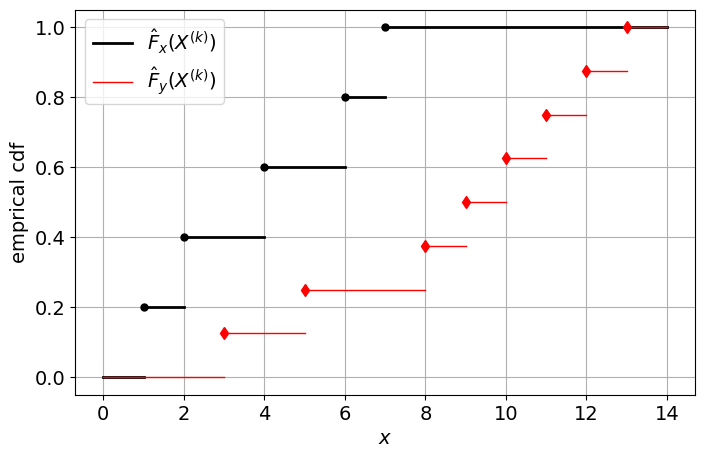

In [10]:
Rxy_k = stats.rankdata(np.concatenate((x_i,y_j))); Rx_i=Rxy_k[:n]; Ry_j=Rxy_k[n:]; RX_k = np.sort(Rxy_k)
plt.plot(Rx_i,Fxhat_i,'k.',ms=10);plt.plot([0,Rx_i[0]],[0,0],'k-',lw=2,label=r'$\hat{F}_x(X^{(k)})$');plt.plot([Rx_i[-1],N+1],[1,1],'k-',lw=2);plt.plot(Ry_j,Fyhat_j,'rd');
for i in range(n-1): plt.plot(Rx_i[i:i+2],[Fxhat_i[i],Fxhat_i[i]],'k-',lw=2);
for j in range(m-1): plt.plot(Ry_j[j:j+2],[Fyhat_j[j],Fyhat_j[j]],'r-',lw=1);
plt.plot([0,Ry_j[0]],[0,0],'r-',lw=1,label=r'$\hat{F}_y(X^{(k)})$');plt.plot([Ry_j[-1],N+1],[1,1],'r-',lw=1);
plt.legend();plt.xlabel(r'$x$');plt.ylabel(r'emprical cdf')
plt.grid();

In [11]:
import itertools;xranks_Ii = np.array([xranks_i for xranks_i in itertools.combinations(RX_k,n)]); xranks_Ii

array([[ 1.,  2.,  3.,  4.,  5.],
       [ 1.,  2.,  3.,  4.,  6.],
       [ 1.,  2.,  3.,  4.,  7.],
       ...,
       [ 8.,  9., 11., 12., 13.],
       [ 8., 10., 11., 12., 13.],
       [ 9., 10., 11., 12., 13.]])

In [12]:
yranks_Ij = np.array([np.setdiff1d(RX_k,xranks_i) for xranks_i in xranks_Ii]); xranks_Ii, yranks_Ij

(array([[ 1.,  2.,  3.,  4.,  5.],
        [ 1.,  2.,  3.,  4.,  6.],
        [ 1.,  2.,  3.,  4.,  7.],
        ...,
        [ 8.,  9., 11., 12., 13.],
        [ 8., 10., 11., 12., 13.],
        [ 9., 10., 11., 12., 13.]]),
 array([[ 6.,  7.,  8., ..., 11., 12., 13.],
        [ 5.,  7.,  8., ..., 11., 12., 13.],
        [ 5.,  6.,  8., ..., 11., 12., 13.],
        ...,
        [ 1.,  2.,  3., ...,  6.,  7., 10.],
        [ 1.,  2.,  3., ...,  6.,  7.,  9.],
        [ 1.,  2.,  3., ...,  6.,  7.,  8.]]))

In [13]:
Fxhat_Ik = np.mean(xranks_Ii[:,None,:]<=RX_k[None,:,None],axis=-1); Fxhat_Ik

array([[0.2, 0.4, 0.6, ..., 1. , 1. , 1. ],
       [0.2, 0.4, 0.6, ..., 1. , 1. , 1. ],
       [0.2, 0.4, 0.6, ..., 1. , 1. , 1. ],
       ...,
       [0. , 0. , 0. , ..., 0.6, 0.8, 1. ],
       [0. , 0. , 0. , ..., 0.6, 0.8, 1. ],
       [0. , 0. , 0. , ..., 0.6, 0.8, 1. ]])

In [14]:
Fyhat_Ik = np.array([np.mean(yranks_j[None,:]<=RX_k[:,None], axis=-1) for yranks_j in yranks_Ij]); Fyhat_Ik

array([[0.   , 0.   , 0.   , ..., 0.75 , 0.875, 1.   ],
       [0.   , 0.   , 0.   , ..., 0.75 , 0.875, 1.   ],
       [0.   , 0.   , 0.   , ..., 0.75 , 0.875, 1.   ],
       ...,
       [0.125, 0.25 , 0.375, ..., 1.   , 1.   , 1.   ],
       [0.125, 0.25 , 0.375, ..., 1.   , 1.   , 1.   ],
       [0.125, 0.25 , 0.375, ..., 1.   , 1.   , 1.   ]])

In [15]:
Tp_I = np.max(Fxhat_Ik-Fyhat_Ik,axis=-1);Tm_I = np.max(Fyhat_Ik-Fxhat_Ik,axis=-1);
T_I = np.max(np.abs(Fxhat_Ik-Fyhat_Ik),axis=-1); T_I

array([1.   , 0.875, 0.8  , ..., 0.875, 0.875, 1.   ])

In [16]:
Tp_I = np.round(Tp_I,decimals=8); Tm_I = np.round(Tm_I,decimals=8); T_I = np.maximum(Tp_I,Tm_I); np.unique(T_I)

array([0.15 , 0.175, 0.2  , 0.225, 0.25 , 0.275, 0.3  , 0.35 , 0.375,
       0.4  , 0.425, 0.475, 0.5  , 0.55 , 0.6  , 0.625, 0.675, 0.75 ,
       0.8  , 0.875, 1.   ])

In [17]:
np.sort(T_I)

array([0.15 , 0.175, 0.175, ..., 0.875, 1.   , 1.   ])

In [18]:
np.mean(T_I>=T)

0.04195804195804196

#### Exercise 6.3.3:

Use the \[two-sample\] Cramér-von Mises test on the data in Exercise 2
and compare results with the Smirnov test.

$H_0: F_X(t) = F_Y(t)$

$H_1: F_X(t) \neq F_Y(t)$ 

$T = 0.55576$

$p$-value  $= 0.02641$

Since $0.02641 < 0.05$, we have sufficent evidence to reject $H_0$.

In [19]:
TCvM = n*m/N**2 * np.sum((Fxhat_k-Fyhat_k)**2); TCvM

0.5557692307692308

In [20]:
TCvM_I = n*m/N**2 * np.sum((Fxhat_Ik-Fyhat_Ik)**2,axis=-1); TCvM_I

array([1.03846154, 0.90961538, 0.8       , ..., 0.81153846, 0.90961538,
       1.03846154])

In [21]:
TCvM_I = np.round(TCvM_I,8); TCvM = np.round(TCvM,8); TCvM_I, TCvM

(array([1.03846154, 0.90961538, 0.8       , ..., 0.81153846, 0.90961538,
        1.03846154]),
 0.55576923)

In [22]:
np.mean(TCvM_I >= TCvM)

0.02641802641802642

#### Followup:

Use the two-sample Anderson-Darling test on the data from exercise
6.3.2.

$H_0: F_X(t) = F_Y(t)$

$H_1: F_X(t) \neq F_Y(t)$ 

$T = 2.74370$

$p$-value  $= 0.03108$

Since $0.03108 < 0.05$, we have sufficent evidence to reject $H_0$.

In [23]:
k_k = 1 + np.arange(N); k_k, N-k_k

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 array([12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0]))

In [24]:
A2 = n*m*np.sum( (Fxhat_k[:-1]-Fyhat_k[:-1])**2 / (k_k[:-1]*(N-k_k[:-1])) ); A2

2.7437022005772

In [25]:
A2_I = n*m*np.sum( (Fxhat_Ik[:,:-1]-Fyhat_Ik[:,:-1])**2 / (k_k[None,:-1]*(N-k_k[None,:-1])), axis=-1 ); A2_I

array([4.90185696, 4.35748196, 3.91641053, ..., 3.8970653 , 4.35748196,
       4.90185696])

In [26]:
A2 = np.round(A2,8); A2_I = np.round(A2_I,8); np.mean(A2_I>=A2)

0.03108003108003108